In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
#import seaborn as sns
#sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [4]:
data = np.load('/Users/louisribieras/Desktop/my_invictus/data/latest_coin_data.pkl')

In [5]:
#drop data
data = data.dropna()

In [6]:
# Initialize a close_price list
close_list = list()
# Making a list of all close_prices
for column in data.columns:
    for date in data.index:
        close_list.append(data[column][date]['close_price'])

In [7]:
# Splitting list into 133 lists (one per coin)
close_list2 = [close_list[i:i+916] for i  in range(0, len(close_list), 916)]

In [8]:
# Make an array
close_ar = np.asarray(close_list2)

In [9]:
# Initialize a close_price list
market_list = list()
# Making a list of all close_prices
for column in data.columns:
    for date in data.index:
        market_list.append(data[column][date]['market_cap'])
        
# Splitting list into 133 lists (one per coin)
market_list2 = [market_list[i:i+916] for i  in range(0, len(market_list), 916)]

# Make an array
market_ar = np.asarray(market_list2)

In [10]:
# Make Close DataFrame
close_df = pd.DataFrame(data = close_ar, index = data.index, columns = data.columns)
close_df = close_df[close_df.columns[::-1]]
close_df.head(5)

,"Jan 01, 2016","Jan 02, 2016","Jan 03, 2016","Jan 04, 2016","Jan 05, 2016","Jan 06, 2016","Jan 07, 2016","Jan 08, 2016","Jan 09, 2016","Jan 10, 2016",...,"Jun 25, 2018","Jun 26, 2018","Jun 27, 2018","Jun 28, 2018","Jun 29, 2018","Jun 30, 2018","Jul 01, 2018","Jul 02, 2018","Jul 03, 2018","Jul 04, 2018"
1337coin,0.032543,0.178951,0.162450,0.009735,0.166796,0.331561,0.917693,0.012750,0.262522,0.448458,...,0.004207,0.135869,0.429225,0.001643,0.003907,0.002892,1.310000,0.018122,0.005061,0.000065
advanced-internet-blocks,0.004773,0.071532,0.014516,0.001008,0.025867,1.610000,0.002487,0.000194,0.003916,0.293148,...,0.175947,0.020991,119.840000,0.374594,0.002815,0.997193,0.095617,0.000139,0.161982,0.098478
adzcoin,2.960000,0.000466,1.520000,0.000067,0.000665,1.650000,0.204210,0.646840,1.470000,0.005029,...,0.390226,1.380000,0.014014,0.330591,0.534775,0.056734,0.006048,0.016335,0.008612,1.300000
aeon,0.024565,0.473724,0.229550,121.430000,0.167220,0.844512,0.103635,0.003198,0.088589,0.002533,...,1.650000,0.002728,0.000133,0.003736,0.299464,17.830000,0.079794,0.000998,0.118963,0.287951
anarchistsprime,0.074862,1.040000,0.000524,0.012320,0.092073,0.000026,0.127684,0.127265,0.524033,15.480000,...,2.130000,0.254645,0.925727,1.710000,0.005840,0.000063,0.102867,163.910000,3.250000,0.000232


In [11]:
# Make Market Cap DataFrame
market_df = pd.DataFrame(data = market_ar, index = data.index, columns = data.columns)
market_df = market_df[market_df.columns[::-1]]
market_df.head(5)

,"Jan 01, 2016","Jan 02, 2016","Jan 03, 2016","Jan 04, 2016","Jan 05, 2016","Jan 06, 2016","Jan 07, 2016","Jan 08, 2016","Jan 09, 2016","Jan 10, 2016",...,"Jun 25, 2018","Jun 26, 2018","Jun 27, 2018","Jun 28, 2018","Jun 29, 2018","Jun 30, 2018","Jul 01, 2018","Jul 02, 2018","Jul 03, 2018","Jul 04, 2018"
1337coin,115521,3.541e+09,4.96594e+06,367340,9.81117e+06,5.83878e+06,1.14262e+07,1.68598e+06,7.04494e+06,1.84661e+10,...,1.0587e+07,437873,3.6569e+06,1.40887e+06,3.09124e+06,12570,2.05991e+07,801209,161340,1.65468e+06
advanced-internet-blocks,102317,1.56506e+07,5.47595e+06,463387,3.2599e+06,4.09306e+07,70009,5.82853e+06,221767,945858,...,5.63921e+06,3.40507e+08,2.4937e+07,2.63687e+06,149765,2.70395e+09,2.20444e+06,189470,9.34015e+07,1.07222e+07
adzcoin,5.76565e+06,1.03068e+06,8.1241e+07,8.24692e+06,497416,6.16667e+06,1.708e+09,3.79063e+07,1.93068e+07,7.66227e+06,...,6.78032e+06,1.57555e+07,1.89135e+06,8.73382e+06,2.11622e+10,2.59037e+06,1.82832e+08,123509,2.173e+06,3.17684e+07
aeon,884957,2.1424e+08,1.85122e+06,6.90022e+09,1.6896e+07,1.50242e+07,174253,3.9564e+06,2.03546e+06,544808,...,3.84204e+07,63727,4.07202e+06,203167,824269,9.50894e+06,5.32971e+06,305990,1.10137e+08,2.794e+06
anarchistsprime,7.51433e+06,6.68379e+07,774057,7.43705e+06,1.34047e+07,5.63917e+06,2.51005e+07,858993,2.74899e+07,1.35438e+08,...,7.98653e+06,2.26113e+09,5.85818e+07,2.46138e+07,9.31111e+06,1.37428e+07,1.36457e+07,2.65233e+09,1.95085e+08,5.73087e+06


In [12]:
def share_cap_recurse(market_cap_list, num_coins, cap_ceiling_amount, final_cap_list):

    not_realloc_val = 0

    realloc_val = 0

    num_final = 0

    new_market_cap_list = []

    

    for i in range(0, len(market_cap_list)):

        if(market_cap_list[i] > cap_ceiling_amount):

            final_cap_list.append(cap_ceiling_amount)

            realloc_val += market_cap_list[i] - cap_ceiling_amount

            num_final += 1

        else:

            not_realloc_val += market_cap_list[i]

     

    if(num_final!=0):

        new_market_cap_list = [x * (1+(realloc_val/not_realloc_val)) for x in market_cap_list[num_final:]]

    else:

        new_market_cap_list = deepcopy(market_cap_list)

    

    if len(final_cap_list) == num_coins:

        return

    elif (new_market_cap_list[0] <= cap_ceiling_amount): #assumes ordered desc in market cap

        for cap in new_market_cap_list:

            final_cap_list.append(cap)

        return       

    else:

        share_cap_recurse(new_market_cap_list, num_coins, cap_ceiling_amount, final_cap_list)

        

def share_cap(market_cap_list, cap_ceiling_percent):  #CHANGE CAP CEILING HERE

    total_cap = sum(market_cap_list)

    cap_ceiling_amount = total_cap * cap_ceiling_percent

    final_cap_list = []

    

    share_cap_recurse(market_cap_list, len(market_cap_list), cap_ceiling_amount, final_cap_list)

    

    return (final_cap_list)

In [13]:
#Selecting data from every week - CHANGE REBALANCING PERIOD PARAMETER HERE
weeklymarket = market_df[market_df.columns[::7]]

In [14]:
weeklymarket.head()

,"Jan 01, 2016","Jan 08, 2016","Jan 15, 2016","Jan 22, 2016","Jan 29, 2016","Feb 05, 2016","Feb 12, 2016","Feb 19, 2016","Feb 26, 2016","Mar 04, 2016",...,"Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018","Jun 29, 2018"
1337coin,115521,1.68598e+06,2.82518e+07,64026,9.66176e+07,5.93202e+06,2.08385e+09,1.20253e+07,4.09928e+07,4.6445e+06,...,1.43703e+07,4.70354e+07,4.81642e+06,6.91196e+06,4.47651e+06,371287,4.03017e+06,7.35356e+07,6.96787e+07,3.09124e+06
advanced-internet-blocks,102317,5.82853e+06,2.57574e+06,1.75535e+09,1.61317e+08,9.94834e+06,1.20136e+07,9.16934e+06,2.81504e+06,3.47281e+08,...,8.18549e+06,2.26718e+06,2.85731e+08,1.89148e+09,2.1612e+06,225526,1.04149e+11,9353,674964,149765
adzcoin,5.76565e+06,3.79063e+07,3.60339e+06,124782,3.86567e+06,4.06914e+06,4.78659e+10,4.47897e+07,4.41049e+06,1.9475e+06,...,5.17877e+07,4.64874e+06,1.87233e+06,1.05019e+07,2.91682e+07,2.1707e+07,2.78794e+07,2.60855e+09,5.76799e+06,2.11622e+10
aeon,884957,3.9564e+06,273407,2.31263e+07,6.77815e+06,1.1574e+06,3.15947e+07,1.09735e+06,5.76193e+08,1.69378e+07,...,1.06381e+06,4.08008e+08,1.26121e+07,796298,4.88058e+07,1.98347e+06,373188,2.36411e+06,5.46431e+06,824269
anarchistsprime,7.51433e+06,858993,9.67027e+07,3.26769e+08,None,1.08055e+06,1.00481e+07,747790,80912,1.07252e+07,...,579475,129631,1.13854e+07,324070,1.14913e+07,2.00668e+08,563812,1.34528e+07,1.41391e+08,9.31111e+06


In [15]:
weeklyclose = close_df[close_df.columns[::7]]
weeklyclose.head()

,"Jan 01, 2016","Jan 08, 2016","Jan 15, 2016","Jan 22, 2016","Jan 29, 2016","Feb 05, 2016","Feb 12, 2016","Feb 19, 2016","Feb 26, 2016","Mar 04, 2016",...,"Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018","Jun 29, 2018"
1337coin,0.032543,0.012750,1.160000,0.002463,0.089979,1.470000,115.810000,0.122494,0.541589,0.007119,...,0.136500,0.664000,0.008180,0.900740,0.013872,0.019134,0.003878,14.030000,54.450000,0.003907
advanced-internet-blocks,0.004773,0.000194,0.252138,0.188716,2.620000,0.576684,0.028273,0.062455,0.287838,0.002988,...,0.047654,0.219332,0.002437,229.200000,1.060000,0.011368,6157.130000,0.002146,0.005396,0.002815
adzcoin,2.960000,0.646840,0.000200,0.081987,0.094344,0.000020,519.740000,0.007187,0.193786,0.026504,...,0.007493,0.195752,0.023894,0.152900,0.027739,1.380000,1.220000,1.000000,0.221924,0.534775
aeon,0.024565,0.003198,0.018572,0.116092,0.056731,0.039693,12.570000,0.011349,0.218986,0.006756,...,0.011403,0.156063,0.004371,0.017420,1.150000,0.094251,0.008060,0.058495,0.014229,0.299464
anarchistsprime,0.074862,0.127265,2.300000,0.033034,0.369443,0.534813,0.522398,0.151937,0.002620,0.345563,...,0.128751,0.003976,0.367412,0.000154,0.266808,0.006680,0.001160,23.480000,2.260000,0.005840


In [16]:
#generating weekly returns for each coin
weeklyclose1 = weeklyclose.copy().T
weeklyreturns = weeklyclose1.pct_change(1).T
weeklyreturns.head()

,"Jan 01, 2016","Jan 08, 2016","Jan 15, 2016","Jan 22, 2016","Jan 29, 2016","Feb 05, 2016","Feb 12, 2016","Feb 19, 2016","Feb 26, 2016","Mar 04, 2016",...,"Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018","Jun 29, 2018"
1337coin,NaN,-0.608211,89.980392,-0.997877,35.532278,15.337145,7.778231e+01,-0.998942,3.421351,-0.986855,...,-0.999014,3.864469,-0.987681,109.114914,-0.984599,0.379325,-0.797324,3616.844250,2.880969,-0.999928
advanced-internet-blocks,NaN,-0.959355,1298.680412,-0.251537,12.883296,-0.779892,-9.509731e-01,1.208998,3.608726,-0.989619,...,1.015394,3.602594,-0.988889,94049.061551,-0.995375,-0.989275,541618.458128,-1.000000,1.514445,-0.478317
adzcoin,NaN,-0.781473,-0.999691,408.935000,0.150719,-0.999788,2.598700e+07,-0.999986,25.963406,-0.863231,...,-0.999986,25.124650,-0.877937,5.399096,-0.818581,48.749450,-0.115942,-0.180328,-0.778076,1.409721
aeon,NaN,-0.869815,4.807380,5.250915,-0.511327,-0.300330,3.156805e+02,-0.999097,18.295621,-0.969149,...,-0.998984,12.686135,-0.971992,2.985358,65.016073,-0.918043,-0.914484,6.257444,-0.756748,20.046033
anarchistsprime,NaN,0.699995,17.072526,-0.985637,10.183720,0.447620,-2.321372e-02,-0.709155,-0.982756,130.894275,...,-0.730258,-0.969119,91.407445,-0.999581,1731.519481,-0.974963,-0.826347,20240.379310,-0.903748,-0.997416


In [17]:
#Shifting all the returns one week forward to align with date
cols = weeklyreturns.columns[:-1]
weeklyreturns = weeklyreturns.drop('Jan 01, 2016', 1)
weeklyreturns.columns = cols
weeklyreturns.head()

,"Jan 01, 2016","Jan 08, 2016","Jan 15, 2016","Jan 22, 2016","Jan 29, 2016","Feb 05, 2016","Feb 12, 2016","Feb 19, 2016","Feb 26, 2016","Mar 04, 2016",...,"Apr 20, 2018","Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018"
1337coin,-0.608211,89.980392,-0.997877,35.532278,15.337145,7.778231e+01,-0.998942,3.421351,-0.986855,108.850822,...,-0.999014,3.864469,-0.987681,109.114914,-0.984599,0.379325,-0.797324,3616.844250,2.880969,-0.999928
advanced-internet-blocks,-0.959355,1298.680412,-0.251537,12.883296,-0.779892,-9.509731e-01,1.208998,3.608726,-0.989619,87291.503347,...,1.015394,3.602594,-0.988889,94049.061551,-0.995375,-0.989275,541618.458128,-1.000000,1.514445,-0.478317
adzcoin,-0.781473,-0.999691,408.935000,0.150719,-0.999788,2.598700e+07,-0.999986,25.963406,-0.863231,4.782561,...,-0.999986,25.124650,-0.877937,5.399096,-0.818581,48.749450,-0.115942,-0.180328,-0.778076,1.409721
aeon,-0.869815,4.807380,5.250915,-0.511327,-0.300330,3.156805e+02,-0.999097,18.295621,-0.969149,1.520426,...,-0.998984,12.686135,-0.971992,2.985358,65.016073,-0.918043,-0.914484,6.257444,-0.756748,20.046033
anarchistsprime,0.699995,17.072526,-0.985637,10.183720,0.447620,-2.321372e-02,-0.709155,-0.982756,130.894275,-0.999346,...,-0.730258,-0.969119,91.407445,-0.999581,1731.519481,-0.974963,-0.826347,20240.379310,-0.903748,-0.997416


In [18]:
#Generating log returns and shifting all returns on week forward to align with date
log_returns = np.log(weeklyclose1).diff().T
log_cols = log_returns.columns[:-1]
log_returns = log_returns.drop('Jan 01, 2016', 1)
log_returns.columns = log_cols
log_returns.head()


,"Jan 01, 2016","Jan 08, 2016","Jan 15, 2016","Jan 22, 2016","Jan 29, 2016","Feb 05, 2016","Feb 12, 2016","Feb 19, 2016","Feb 26, 2016","Mar 04, 2016",...,"Apr 20, 2018","Apr 27, 2018","May 04, 2018","May 11, 2018","May 18, 2018","May 25, 2018","Jun 01, 2018","Jun 08, 2018","Jun 15, 2018","Jun 22, 2018"
1337coin,-0.937031,4.510644,-6.154795,3.598196,2.793441,4.366689,-6.851644,1.486445,-4.331740,4.699123,...,-6.921579,1.581958,-4.396590,4.701524,-4.173344,0.321594,-1.596147,8.193634,1.356085,-9.542268
advanced-internet-blocks,-3.202872,7.169874,-0.289733,2.630686,-1.513635,-3.015387,0.792539,1.527952,-4.567794,11.377020,...,0.700815,1.526620,-4.499819,11.451582,-5.376326,-4.535222,13.202319,-14.869516,0.922052,-0.650696
adzcoin,-1.520846,-8.081537,6.015999,0.140387,-8.458971,17.073107,-11.188810,3.294481,-1.989459,1.754847,...,-11.178424,3.262879,-2.103221,1.856157,-1.706945,3.906999,-0.123233,-0.198851,-1.505420,0.879511
aeon,-2.038797,1.759129,1.832728,-0.716062,-0.357146,5.757893,-7.009939,2.959878,-3.478577,0.924428,...,-6.891577,2.616383,-3.575268,1.382627,4.189898,-2.501556,-2.459048,1.982028,-1.413659,3.046712
anarchistsprime,0.530625,2.894393,-4.243127,2.414459,0.369921,-0.023487,-1.234964,-4.060292,4.882001,-7.332395,...,-1.310290,-3.477604,4.526208,-7.777287,7.457332,-3.687411,-1.750698,9.915484,-2.340784,-5.958389


In [19]:
top20mc = {}
sc = {}
tc = {}
ps = {}
invest = {}
returns = {}
lg_returns = {}
weekmc = {}

#for every date
for column in weeklymarket:
    #sort in descending order
    weekmc[column] = weeklymarket[column].sort_values(ascending=False)
    
    #take the top 20 - CHANGE NUMBER OF COINS PARAMETER HERE
    top20mc[column] = weekmc[column].head(20)
    #take the index of the top 20 
    top20coins = {}
    top20coins[column] = top20mc[column].index
    
    #get the share cap of the top 20
    sc[column] = share_cap(top20mc[column], 0.1)
    
    #total cap of top 20
    tc[column] = sum(sc[column])
    
    #percentage share to be allocated for top 20
    ps[column] = [x / tc[column] for x in sc[column] ]
    
    #building dataframe of top20 coins by mc and %share to be invested
    invest[column] = pd.DataFrame()
    invest[column] = pd.DataFrame({'coin': top20coins[column], 'pct_share': ps[column]})
    invest[column] = invest[column].set_index('coin')
        
     #building dataframe for log_returns
    for name in log_returns:
        lg_returns[column] = pd.DataFrame()
        lg_returns[column] = pd.DataFrame({'log_returns': log_returns[name]})
        lg_returns[column] = lg_returns[column].loc[top20coins[column]]
        
    #building dataframe of top 20 coins by mc and close price of that week
    for name in weeklyreturns:
        returns[column] = pd.DataFrame()
        returns[column] = pd.DataFrame({'returns': weeklyreturns[name]})
        returns[column] = returns[column].loc[top20coins[column]]

        
    
        

To access dataframes created above, 

1. invest['date']. 
2. returns['date']
3. lg_returns['date']

TUNABLE PARAMETERS:

1. Rebalancing Period
2. Number of Coins
3. Cap Ceiling



In [20]:
invest['Jun 01, 2018']

,pct_share
coin,
piggycoin,0.100000
fantomcoin,0.100000
namecoin,0.100000
bitbay,0.100000
cloakcoin,0.086939
maidsafecoin,0.067584
vertcoin,0.052083
bitsend,0.049706
circuits-of-value,0.045377


In [21]:
lg_returns['Jun 01, 2018']

,log_returns
piggycoin,0.888793
fantomcoin,0.411526
namecoin,2.691243
bitbay,-2.659288
cloakcoin,-3.323993
maidsafecoin,-13.584572
vertcoin,-5.380145
bitsend,1.522998
circuits-of-value,3.404371
anarchistsprime,-5.958389


In [22]:
portfolio_all_returns = list()

#for loop to generate portfolio returns for a particular week
portfolio_lg_returns = {}

for name, df in invest.items():
    portfolio_lg_returns[name] = invest[name].transpose().dot(lg_returns[name])
    portfolio_all_returns.append(portfolio_lg_returns[name]['log_returns'])

In [23]:
portfolio_lg_returns['Jan 01, 2016']

,log_returns
pct_share,0.666038


In [24]:
#compiling and cleaning the table into a readable format
final_portfolio_lg_returns = pd.DataFrame(portfolio_all_returns)
final_portfolio_lg_returns.columns = ['weekly_portfolio_lg_returns']
final_portfolio_lg_returns['date'] = weeklyclose1.index
final_portfolio_lg_returns = final_portfolio_lg_returns.set_index('date')

In [25]:
#DATAFRAME OF PORTFOLIO'S LG RETURNS!!
final_portfolio_lg_returns

,weekly_portfolio_lg_returns
date,
"Jan 01, 2016",0.666038
"Jan 08, 2016",-0.664378
"Jan 15, 2016",-1.307258
"Jan 22, 2016",0.520217
"Jan 29, 2016",-2.475732
"Feb 05, 2016",-0.039368
"Feb 12, 2016",-1.648859
"Feb 19, 2016",-1.457213
"Feb 26, 2016",2.349826


Can individually verify
To access log returns of portfolio of a particular week, follow format below:

portfolio_lg_returns['Jan 08, 2016']

ignore the index name

In [26]:
final_portfolio_lg_returns.sum()

weekly_portfolio_lg_returns   -26.421274
dtype: float64

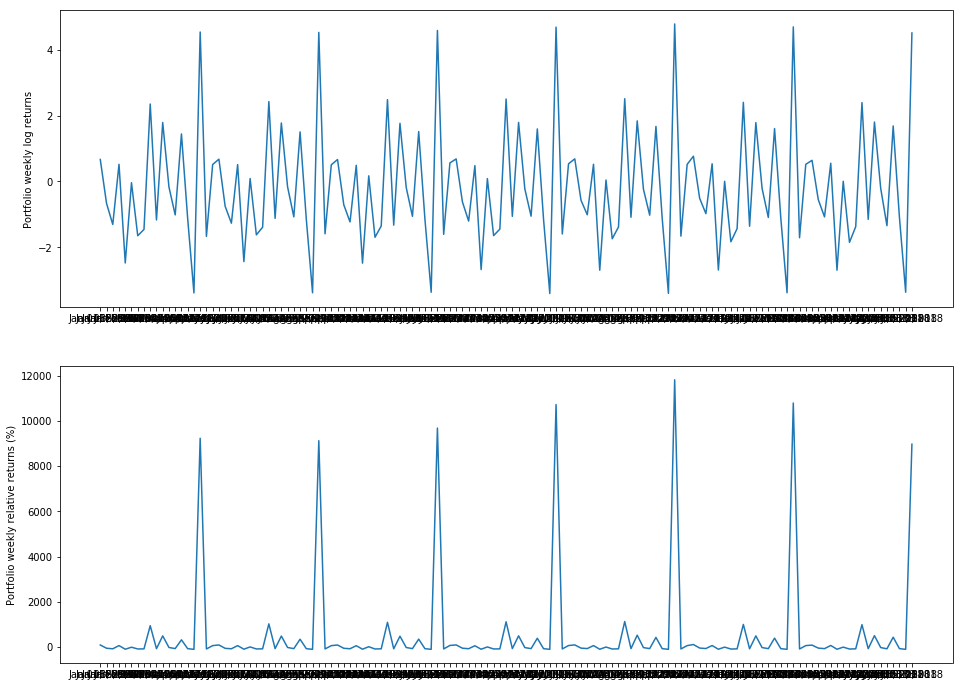

In [27]:
#Take a look at weekly returns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))
ax1.plot(final_portfolio_lg_returns.index, final_portfolio_lg_returns)
ax1.set_ylabel('Portfolio weekly log returns')

weekly_relative_returns = (np.exp(final_portfolio_lg_returns) - 1)
ax2.plot(weekly_relative_returns.index, 100 * weekly_relative_returns)
ax2.set_ylabel('Portfolio weekly relative returns (%)')

plt.show()

In [ ]:
total_relative_returns = (np.exp(final_portfolio_lg_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(final_portfolio_lg_returns.index, final_portfolio_lg_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [ ]:
total_relative_returns.tail()

In [ ]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns['weekly_portfolio_lg_returns'].iloc[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

weekly --> more periodic 
4-weekly --> lower frequency but still periodic

10 coins - still lose 100%
5 coins --> positive portfolio return



trend in coins still periodic, unsure why